<a href="https://colab.research.google.com/github/RummanAli/FYP2022-KnowledgeVision/blob/main/Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input, Add, Reshape,Conv2D,MaxPooling2D,ZeroPadding2D,experimental,AveragePooling2D
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
import numpy as np
import keras
from keras import layers
import cv2

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [4]:
imgs = []
for i,img in enumerate(x_train):
  res = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
  imgs.append(res)

In [5]:
imgs_test = []
for img in (x_test):
  res = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
  imgs_test.append(res)

In [6]:
imgs = np.array(imgs)
imgs_test = np.array(imgs_test)
imgs = np.expand_dims(imgs, axis=-1)
imgs_test = np.expand_dims(imgs_test,axis = -1)

In [7]:
del x_train
del x_test

In [8]:
def ResBlock(filter,kernel,stride1,stride2,padding,input):
  conv1 = Conv2D(filter,kernel,(stride1,stride1),padding,activation='relu')(input)
  return Conv2D(filter,kernel,(stride2,stride2),padding,activation='relu')(conv1)

In [10]:
Conv_ops = [3,3,5,2]
filter = 64
input = Input((224,224,1))
b1l0 = ZeroPadding2D(padding = (3,3))(input)
b1l1 = Conv2D(64,7,(2,2),padding = 'valid',activation='relu')(b1l0)
b1l1 = ZeroPadding2D(padding = (1,1))(b1l1)
b1l2 = MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding="valid")(b1l1)
for i in range(4):  
  for ops in range(Conv_ops[i]):
    b1l3 = ResBlock(filter,3,1,1,'same',b1l2)
    if (ops == (Conv_ops[i]-1)):
      b1l2 = Conv2D(filter*2,1,(2,2),padding = 'valid',activation='relu')(b1l2)
    else:
      b1l2 = Add()([b1l3, b1l2])
  if i == 3:
    break
  else:
    filter = filter * 2
    b1l3 = ZeroPadding2D(padding = (1,1))(b1l3)
    b1l3 = Conv2D(filter,3,(2,2),padding = 'valid',activation='relu')(b1l3)
    b1l3 = Conv2D(filter,3,(1,1),padding = 'same',activation='relu')(b1l3)
    b1l2 = Add()([b1l3, b1l2])
b1l3 = AveragePooling2D(pool_size=(3, 3), strides=(2,2))(b1l3)
b1l3 = Flatten()(b1l3)
b1l3 = Dense(1000, activation='relu')(b1l3)
b1l3 = Dense(10,activation='softmax')(b1l3)
model = Model(inputs=input, outputs=b1l3)

In [11]:
#model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
history = model.fit(x = imgs,y = y_train,epochs = 5,validation_data=(imgs_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 321s 154ms/step - loss: 5.2870 - accuracy: 0.9236 - val_loss: 0.0831 - val_accuracy: 0.9740
Epoch 2/5
1875/1875 [==============================] - 287s 153ms/step - loss: 0.0623 - accuracy: 0.9810 - val_loss: 0.0448 - val_accuracy: 0.9855
Epoch 3/5
1875/1875 [==============================] - 286s 153ms/step - loss: 0.0464 - accuracy: 0.9857 - val_loss: 0.0399 - val_accuracy: 0.9861
Epoch 4/5
1875/1875 [==============================] - 286s 153ms/step - loss: 0.0445 - accuracy: 0.9862 - val_loss: 0.0444 - val_accuracy: 0.9857
Epoch 5/5
1875/1875 [==============================] - 285s 152ms/step - loss: 0.0444 - accuracy: 0.9873 - val_loss: 0.0933 - val_accuracy: 0.9824


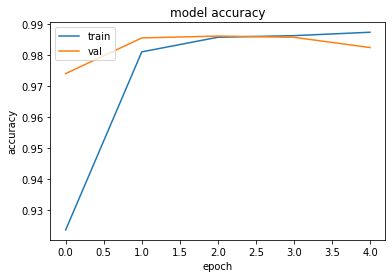

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [9]:
Conv_ops = [3,3,5,2]
filter = 64
input = Input((224,224,1))
b1l0 = ZeroPadding2D(padding = (3,3))(input)
b1l1 = Conv2D(64,7,(2,2),padding = 'valid',activation='relu')(b1l0)
b1l1 = ZeroPadding2D(padding = (1,1))(b1l1)
b1l2 = MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding="valid")(b1l1)
for i in range(4):  
  for ops in range(Conv_ops[i]):
    b1l3 = ResBlock(filter,3,1,1,'same',b1l2)
  if i == 3:
    break
  else:
    filter = filter * 2
    b1l3 = ZeroPadding2D(padding = (1,1))(b1l3)
    b1l3 = Conv2D(filter,3,(2,2),padding = 'valid',activation='relu')(b1l3)
    b1l3 = Conv2D(filter,3,(1,1),padding = 'same',activation='relu')(b1l3)
    b1l2 = b1l3
b1l3 = AveragePooling2D(pool_size=(3, 3), strides=(2,2))(b1l3)
b1l3 = Flatten()(b1l3)
b1l3 = Dense(1000, activation='relu')(b1l3)
b1l3 = Dense(10,activation='softmax')(b1l3)
model2 = Model(inputs=input, outputs=b1l3)

In [10]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(x = imgs,y = y_train,epochs = 5,validation_data=(imgs_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 331s 160ms/step - loss: 2.3133 - accuracy: 0.1117 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/5
1875/1875 [==============================] - 298s 159ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/5
1875/1875 [==============================] - 298s 159ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/5
1875/1875 [==============================] - 298s 159ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/5
1875/1875 [==============================] - 298s 159ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135


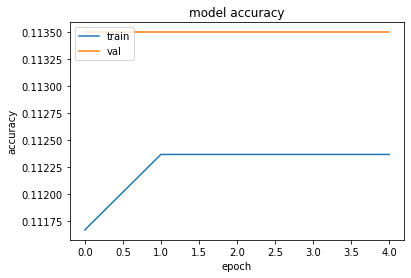

In [12]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()